# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [2]:
!pip install --upgrade matplotlib

Requirement already up-to-date: matplotlib in /opt/conda/lib/python3.6/site-packages (3.3.4)


In [3]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import collections
import os 

dir_dogs = '/data/dog_images'
dir_humans = '/data/lfw'

dir_valid = '/data/dog_images/valid'
dir_train = '/data/dog_images/train'
dir_test = '/data/dog_images/test'


def GetFileCount(dirc):
    N_c = 0  # total files
    for dirpath, dirnames, filenames in os.walk(dirc):
        N_c += len(filenames)
    print( "Total Files in ", dirc ,N_c)


def GetFolderCount (dirc):
    print("Total folder in ", dirc, " ", len([name for name in os.listdir(dirc) if not os.path.isfile(os.path.join(dirc, name))]))



def GetHistogramData(dir, sort_by):
    file_dict = {}
    file_name = []
    images_count_per_file = []

    for folder in os.listdir(dir):
        if sort_by == 'keys':
            file_name.append(int(folder[:3]))
        else:
            file_name.append(folder)
    
        for dirpath, dirnames, filenames in os.walk(os.path.join(dir, folder)):
            images_count_per_file.append(len(filenames))
            if sort_by == 'keys':
                file_dict[int(folder[:3])] = len(filenames)
            else:
                file_dict[folder] = len(filenames)

    if sort_by == 'keys':
        ordered_files = collections.OrderedDict(sorted(file_dict.items()))
    else:
        ordered_files = {k: v for k, v in sorted(file_dict.items(), key=lambda item: item[1], reverse=True)}

    images_count_per_file = []
    file_name = []

    for k, v in ordered_files.items():
        images_count_per_file.append(v)
        file_name.append(k)

    return file_name, images_count_per_file, file_dict
    

def plotHorizontalLines(x_data, y_data, label, x_label):
    fig = plt.figure(figsize=(30, 10))
    plt.rcParams.update({'font.size': 12})
    plt.bar(np.array(x_data), np.array(y_data), align='edge') # A bar chart
    plt.xlabel('\n\n' + x_label)
    plt.ylabel('Number of images/class\n\n')
    plt.title(label)
    plt.xticks(rotation=45)
    for i in range(len(y_data)):
        plt.hlines(y_data[i], 0, x_data[i]) # Here you are drawing the horizontal lines
    plt.show()  

In [4]:
GetFileCount(dir_test)
GetFileCount(dir_train)
GetFileCount(dir_valid)

GetFolderCount(dir_humans)
GetFolderCount(dir_dogs)
GetFolderCount(dir_test)
GetFolderCount(dir_train)
GetFolderCount(dir_valid)

Total Files in  /data/dog_images/test 836
Total Files in  /data/dog_images/train 6680
Total Files in  /data/dog_images/valid 835
Total folder in  /data/lfw   5749
Total folder in  /data/dog_images   3
Total folder in  /data/dog_images/test   133
Total folder in  /data/dog_images/train   133
Total folder in  /data/dog_images/valid   133


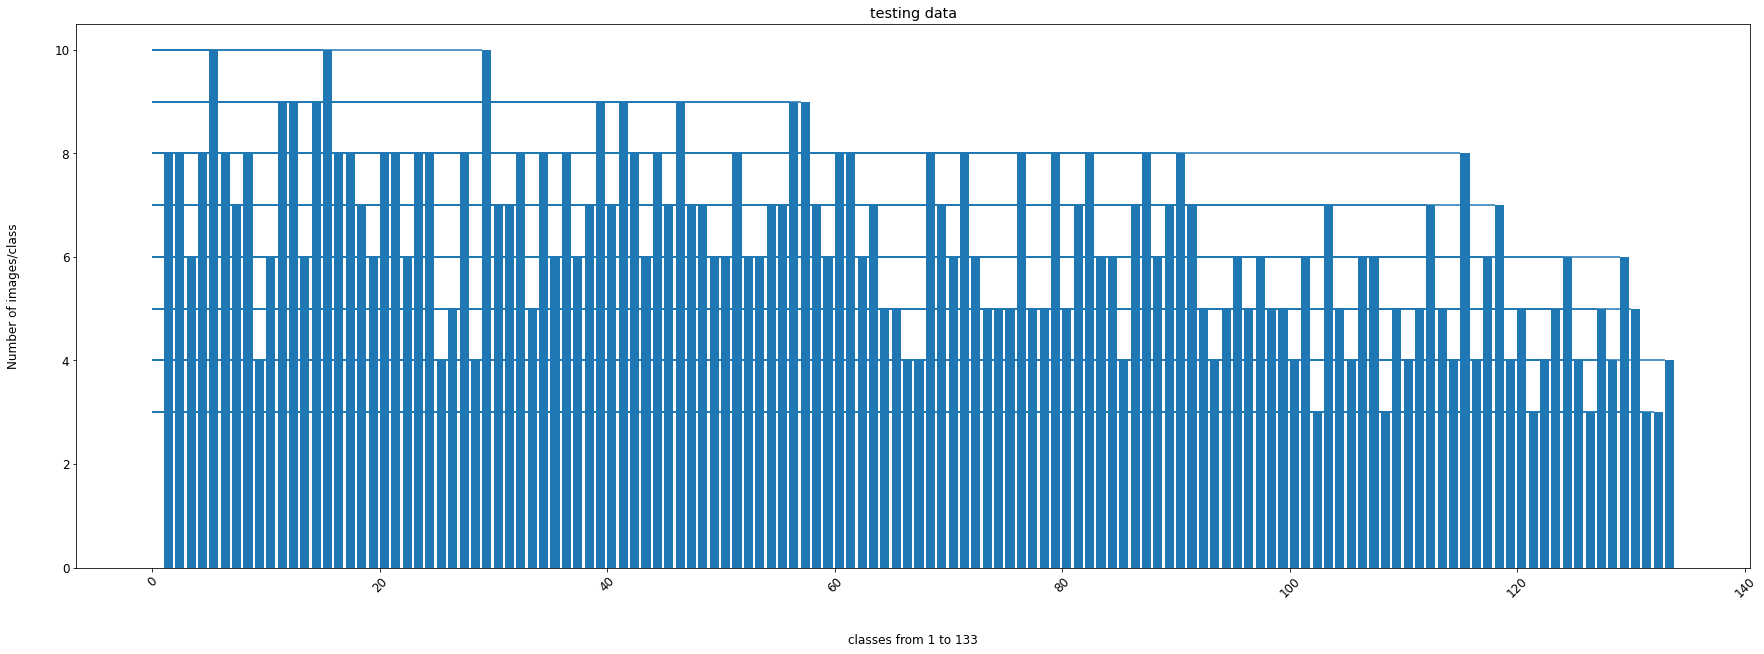

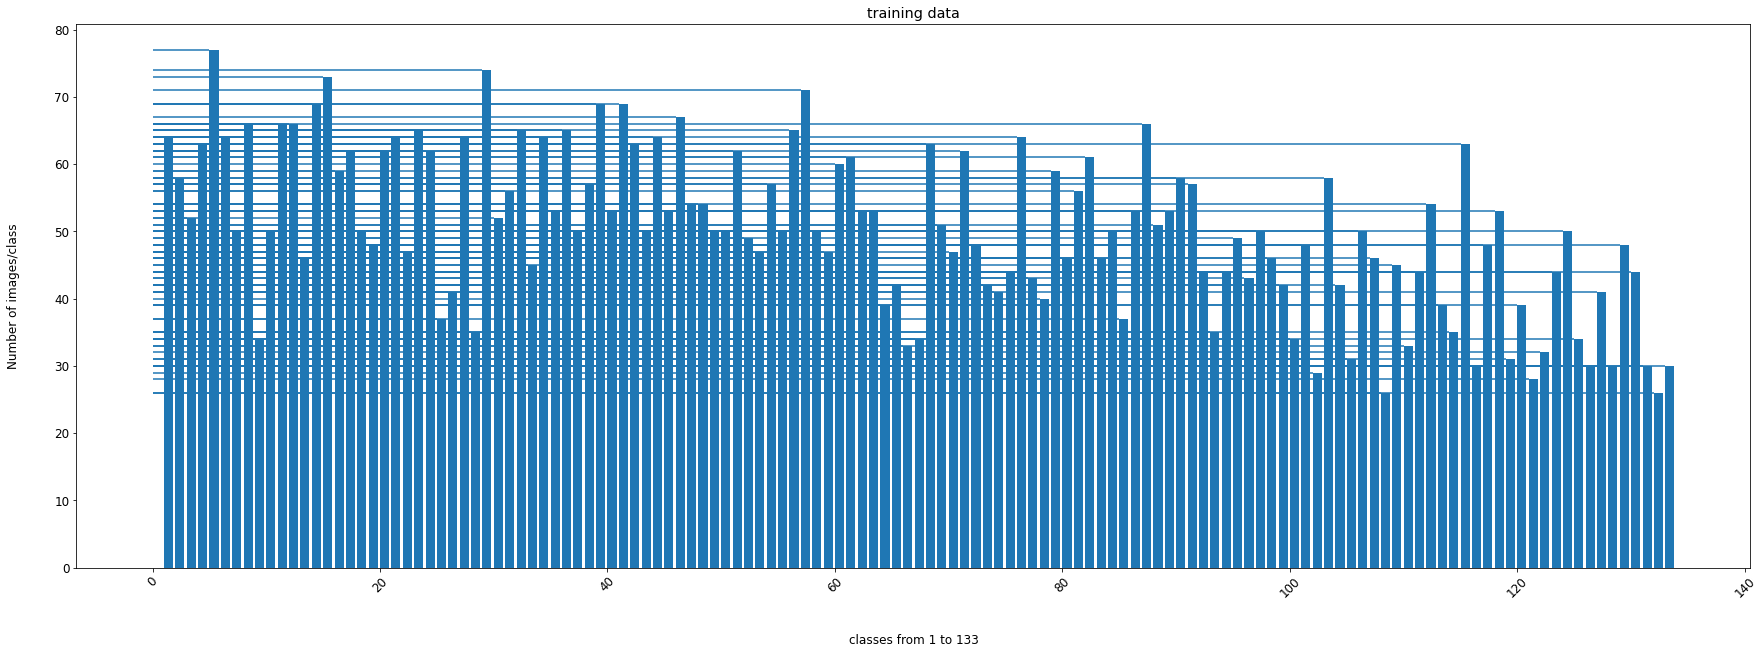

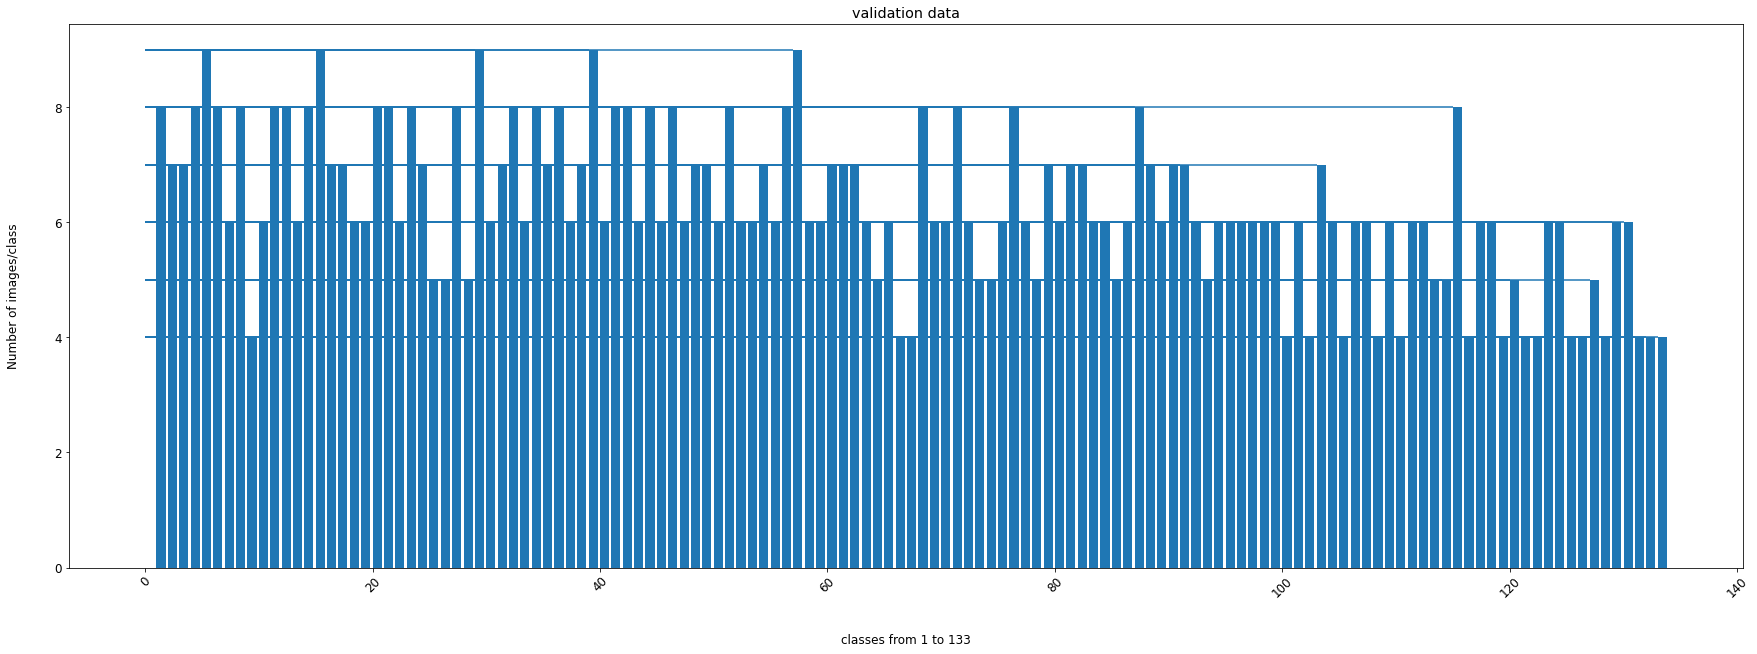

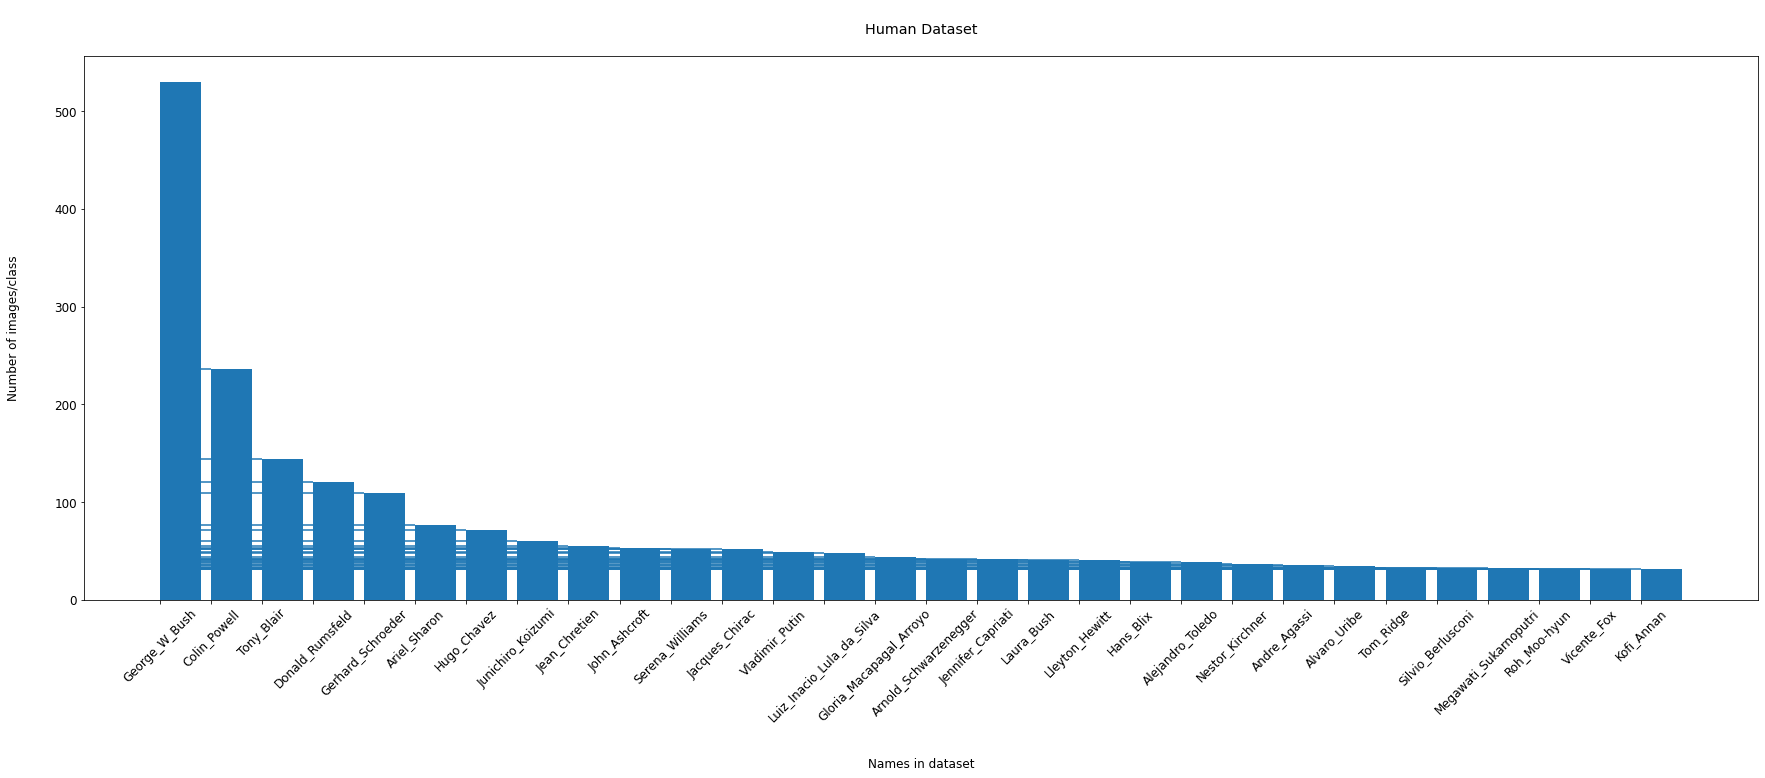

In [5]:
files, count, file_and_count = GetHistogramData(dir_test, 'keys')
plotHorizontalLines(files, count, 'testing data', 'classes from 1 to 133')
files, count, file_and_count = GetHistogramData(dir_train, 'keys')
plotHorizontalLines(files, count, 'training data', 'classes from 1 to 133')
files, count, file_and_count = GetHistogramData(dir_valid, 'keys')
plotHorizontalLines(files, count, 'validation data', 'classes from 1 to 133')
files, count, file_and_count = GetHistogramData(dir_humans, 'values')
plotHorizontalLines(files[:30], count[: 30], "\nHuman Dataset\n", 'Names in dataset')

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


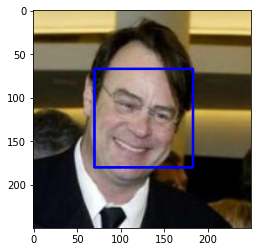

In [6]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [7]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
17 % of dogs images were considered humans, and 98% of human images were acutal humans

In [8]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def GetDetectionCount(model, path1, path2):
    
    HumanAsHuman = 0
    DogAsHuman = 0
    
    for human_img , dog_img in zip(path1, path2):
        if model(human_img):
            HumanAsHuman += 1
        if model(dog_img):
            DogAsHuman += 1
    
    return HumanAsHuman, DogAsHuman

HumanAsHuman, DogAsHuman = GetDetectionCount(face_detector, human_files_short, dog_files_short)
print("Number of humans detected: ", HumanAsHuman, " from total number of ", len(human_files_short))
print("Number of dogs detected: ", DogAsHuman, " from total number of ", len(dog_files_short))

Number of humans detected:  98  from total number of  100
Number of dogs detected:  17  from total number of  100


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [10]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](https://pytorch.org/vision/stable/models.html).

In [11]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Set model to evaluation mode
    VGG16.eval()

    # From pytorch: All pre-trained models expect input images normalized in the same way, 
    # i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), 
    # where H and W are expected to be at least 224. 
    image = Image.open(img_path)

    # if needed; use transforms.CenterCrop(size=224) instead of .Resize
    transform = transforms.Compose([transforms.Resize((224, 224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406], 
                                                         [0.229, 0.224, 0.225]),])
    
    image = transform(image).unsqueeze(0).to(device)
    Labels = VGG16(image)

    return Labels.cpu().detach().numpy().argmax()  # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [12]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function
    predicted_class_index = VGG16_predict(img_path)
    
    return (predicted_class_index >= 151 and predicted_class_index <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
0% of human images were classified as dogs and 100% of dog images were actual dogs

In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def Asses_DogDetector(humans, dogs):
    
    DogsAsDogs = 0
    HumansAsDogs = 0
    
    for human_img , dog_img in zip(humans, dogs):
        if dog_detector(dog_img):
            DogsAsDogs += 1
        if dog_detector(human_img):
            HumansAsDogs += 1

    return HumansAsDogs, DogsAsDogs

HumansAsDogs, DogsAsDogs = Asses_DogDetector(human_files_short, dog_files_short)
print("Number of humans detected: ", HumansAsDogs, " from total number of ", len(human_files_short))
print("Number of dogs detected: ", DogsAsDogs, " from total number of ", len(dog_files_short))

Number of humans detected:  0  from total number of  100
Number of dogs detected:  100  from total number of  100


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [14]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [15]:
import os
from torchvision import datasets

# ### TODO: Write data loaders for training, validation, and test sets
# ## Specify appropriate transforms, and batch_sizes

def Create_DataLoader(image_path, data):
  # Create the appropriate transformer
    if data == 'train':
        transform = transforms.Compose([transforms.Resize(256),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.RandomRotation(25),
                                        transforms.CenterCrop(227),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225]),])
    
    else:
        transform = transforms.Compose([transforms.Resize(256),
                                        transforms.CenterCrop(227),
                                        transforms.ToTensor(),
                                        transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225]),])

    dataset = datasets.ImageFolder(image_path, transform=transform)
    Data_loader = torch.utils.data.DataLoader(dataset, shuffle=True, batch_size=32)

    return Data_loader, dataset

dir_dogs_valid = '/data/dog_images/valid'
dir_dogs_train = '/data/dog_images/train'
dir_dogs_test = '/data/dog_images/test'

train_loader,_ = Create_DataLoader(dir_dogs_train, 'train')
test_loader,_ = Create_DataLoader(dir_dogs_test, 'test')
valid_loader,_ = Create_DataLoader(dir_dogs_valid, 'valid')

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:       
A. Resizing the images and picking the input tensor size                 
A.1. Resizing the images are done in 2 steps:     
1. Resizing all images to 256 shape. This is to make sure that, whatever the input images' shape are, they all have the same size which is 256. This asserts the uniformity in input images
2. Cropping the center to an exact input size. This step assumes that all input images contain humans and dogs right at the center of that image. In this case, after resizing all images to 256, cropping to the center seems to assert to get the most important features of the image.                         
                         
A.2. the size chosen for the input images is 227. This was for 2 reasons:         
1. Pytorch documentation specified that all pre-trained models need input shape of at least H and W = 224. So 227 applies this condition
2. The implemented CNN is inspired by Alex Net architecture. The input in this network was 227. So 227 seems pretty much full of features and has the right amount of space.
                            
B. Data augmentation:      
I did rotate and flip some images using the transform, but only for the training data.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [16]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # The network is inspired by AlexNet architecture
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=2)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(96, 256, kernel_size=3, stride=1, padding=(1, 1))
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv3 = nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=(1, 1))
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.FC2 = nn.Linear(384, 133)


    def forward(self, x):
        ## Define forward behavior
        f = self.conv1(x)
        f = F.relu(f)
        f = self.maxpool1(f)
        f = self.conv2(f)
        f = F.relu(f)
        f = self.maxpool2(f)
        f = self.conv3(f)
        f = F.relu(f)
        f = self.avgpool(f)
        f = f.view(f.shape[0], -1)
        f = self.FC2(f)

        return f

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    print("Using CUDA on GPU")

Using CUDA on GPU


In [17]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 96, kernel_size=(3, 3), stride=(2, 2))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (avgpool): AdaptiveAvgPool2d(output_size=1)
  (FC2): Linear(in_features=384, out_features=133, bias=True)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__                           
First of all, the model was based on Alex Net architecture as it's well known for its performance and it's the baseline for other architectures. I chose the same input dimensions (C, H, W). 
                                       
Starting with a convolutional layer seems the right decision as they behave the best when the input is an image. The first Convolution layer is used to detect early stages features which can be called "Detector stage".  
                                                  
It's then followed by maxpool, it represents a summary statistic of its input. Pooling layers in general helps to lower the variations in the input. This means, even when augmenting the data, we can still have same values of the original data but slightly changed.               
Then keeping this sequence of Conv2d and maxpool resulted in a pretty much good performance.                              
                                      
In literature, all the network dimensions were generated using trial and error methods. There was no straight way to detect the right amount of channels, kernel size, stride, padding, etc...


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [18]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [19]:
val_losses = []
train_losses = []
val_losses_internel = []
train_losses_internel  = []

Epoch: 1 	Training Loss: 0.000672 	Validation Loss: 0.005427

Validation loss has dcreased from inf to 0.005427! Saving model~



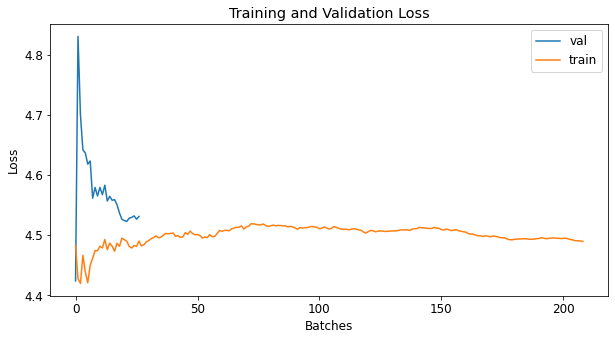

Epoch: 2 	Training Loss: 0.000660 	Validation Loss: 0.005420

Validation loss has dcreased from 0.005427 to 0.005420! Saving model~



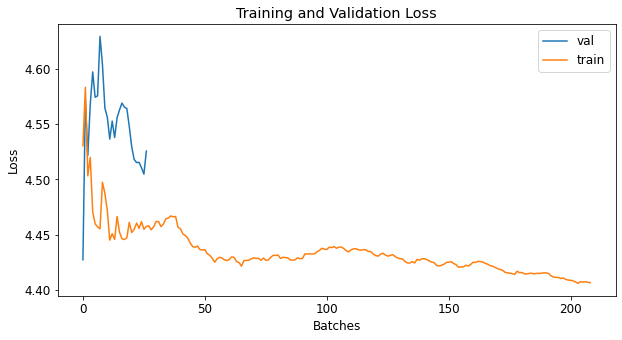

Epoch: 3 	Training Loss: 0.000644 	Validation Loss: 0.005258

Validation loss has dcreased from 0.005420 to 0.005258! Saving model~



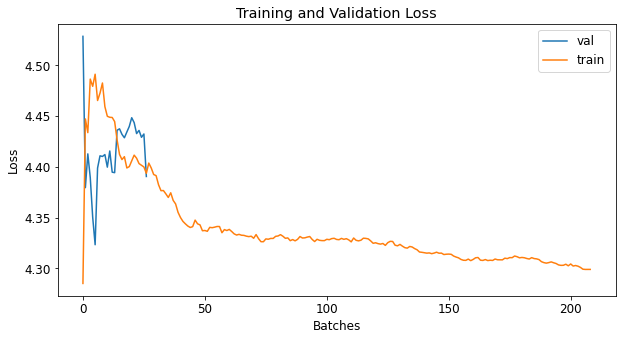

Epoch: 4 	Training Loss: 0.000634 	Validation Loss: 0.005162

Validation loss has dcreased from 0.005258 to 0.005162! Saving model~



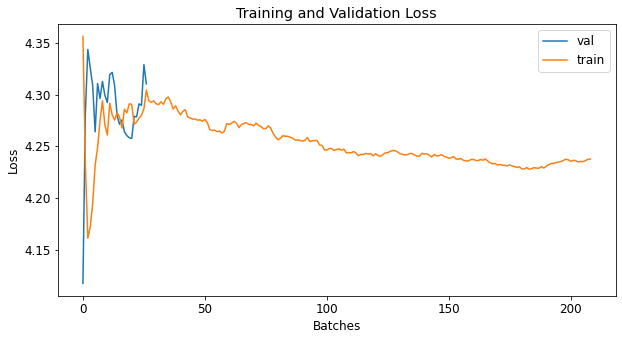

Epoch: 5 	Training Loss: 0.000616 	Validation Loss: 0.005100

Validation loss has dcreased from 0.005162 to 0.005100! Saving model~



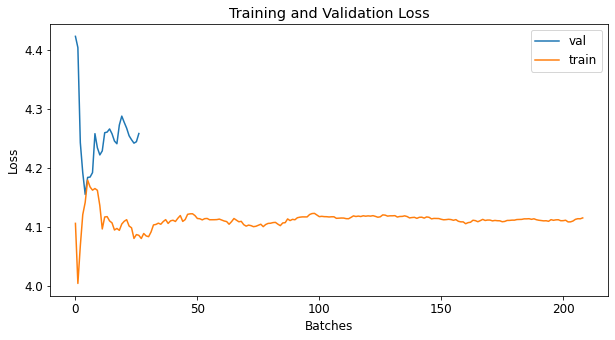

Epoch: 6 	Training Loss: 0.000601 	Validation Loss: 0.005014

Validation loss has dcreased from 0.005100 to 0.005014! Saving model~



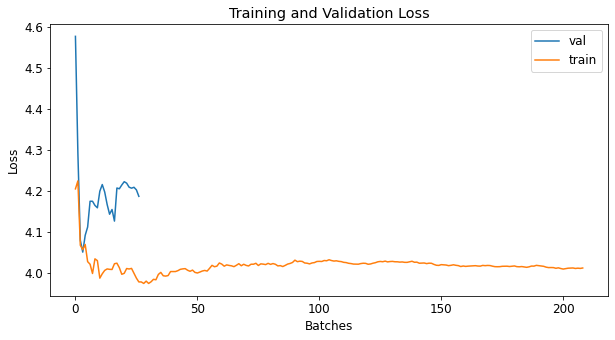

Epoch: 7 	Training Loss: 0.000583 	Validation Loss: 0.004988

Validation loss has dcreased from 0.005014 to 0.004988! Saving model~



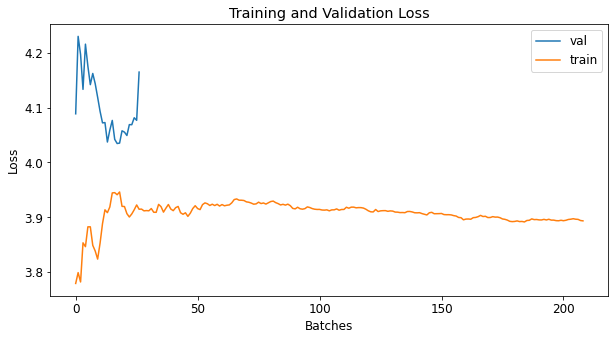

Epoch: 8 	Training Loss: 0.000565 	Validation Loss: 0.004825

Validation loss has dcreased from 0.004988 to 0.004825! Saving model~



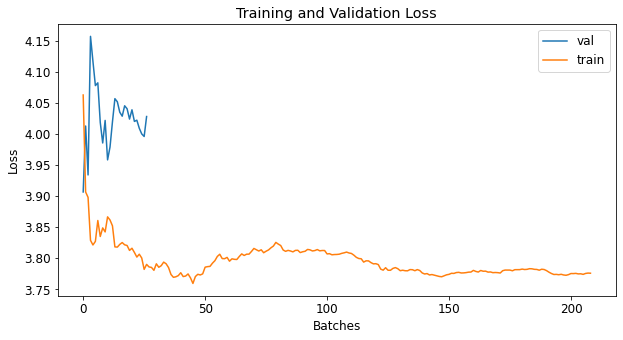

Epoch: 9 	Training Loss: 0.000550 	Validation Loss: 0.004731

Validation loss has dcreased from 0.004825 to 0.004731! Saving model~



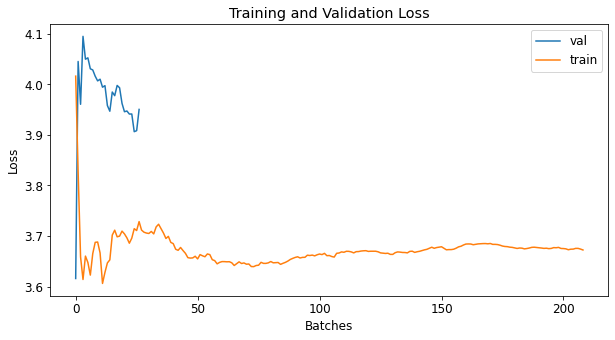

Epoch: 10 	Training Loss: 0.000537 	Validation Loss: 0.004581

Validation loss has dcreased from 0.004731 to 0.004581! Saving model~



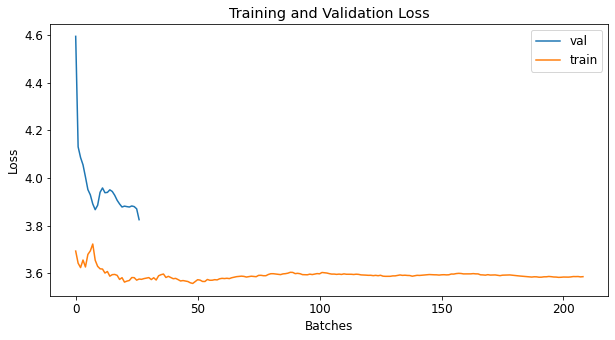

Epoch: 11 	Training Loss: 0.000524 	Validation Loss: 0.004620


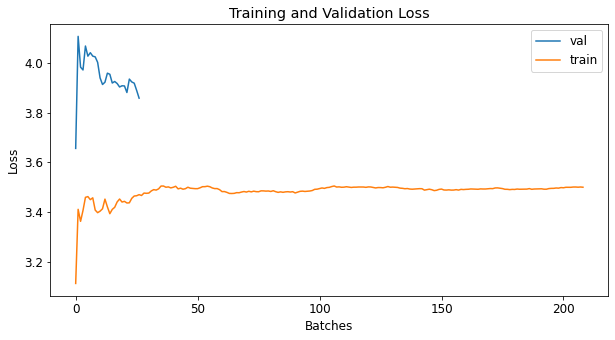

Epoch: 12 	Training Loss: 0.000512 	Validation Loss: 0.004618


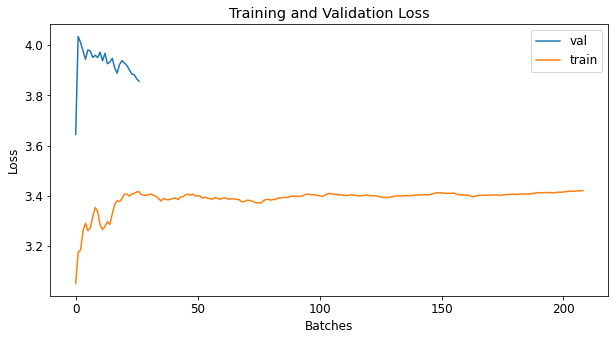

Epoch: 13 	Training Loss: 0.000504 	Validation Loss: 0.004511

Validation loss has dcreased from 0.004581 to 0.004511! Saving model~



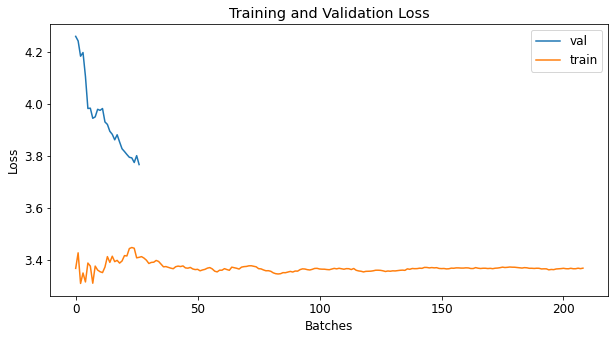

Epoch: 14 	Training Loss: 0.000490 	Validation Loss: 0.004474

Validation loss has dcreased from 0.004511 to 0.004474! Saving model~



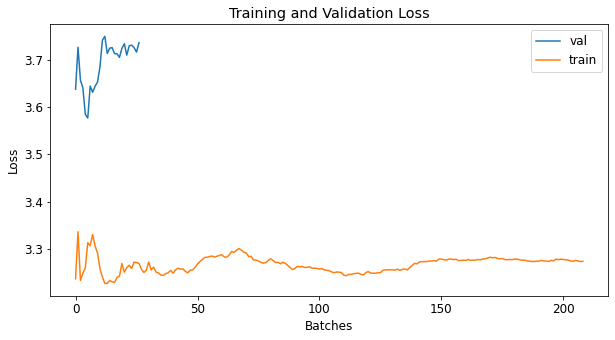

Epoch: 15 	Training Loss: 0.000481 	Validation Loss: 0.004385

Validation loss has dcreased from 0.004474 to 0.004385! Saving model~



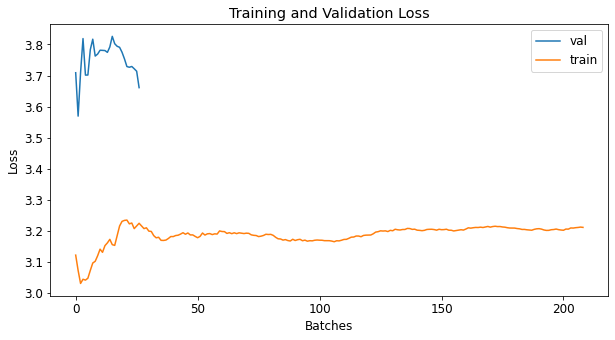

Epoch: 16 	Training Loss: 0.000471 	Validation Loss: 0.004448


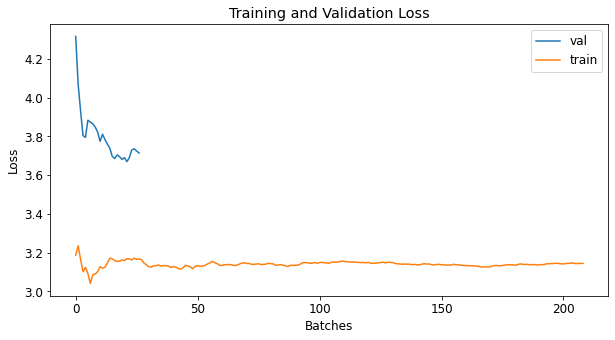

Epoch: 17 	Training Loss: 0.000462 	Validation Loss: 0.004473


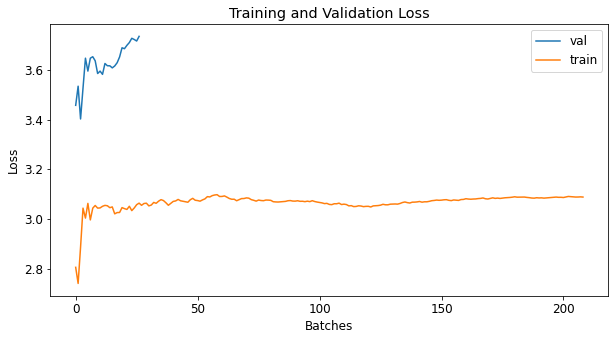

Epoch: 18 	Training Loss: 0.000452 	Validation Loss: 0.004321

Validation loss has dcreased from 0.004385 to 0.004321! Saving model~



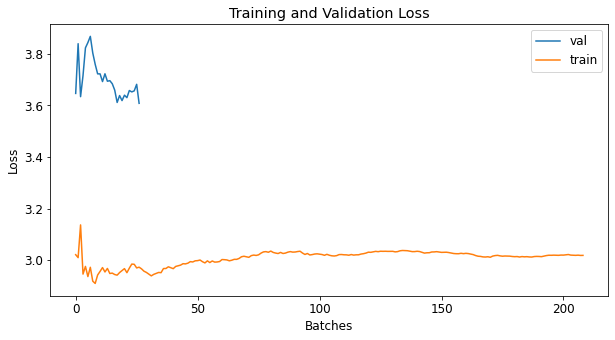

Epoch: 19 	Training Loss: 0.000445 	Validation Loss: 0.004286

Validation loss has dcreased from 0.004321 to 0.004286! Saving model~



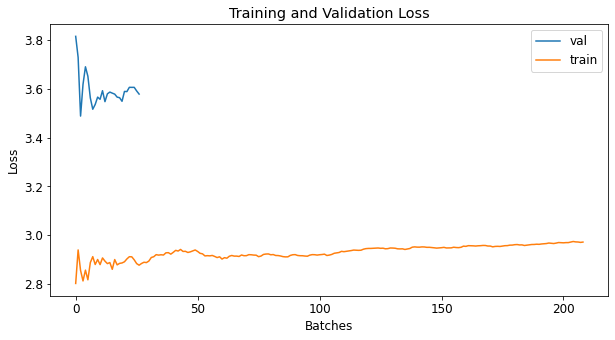

Epoch: 20 	Training Loss: 0.000435 	Validation Loss: 0.004297


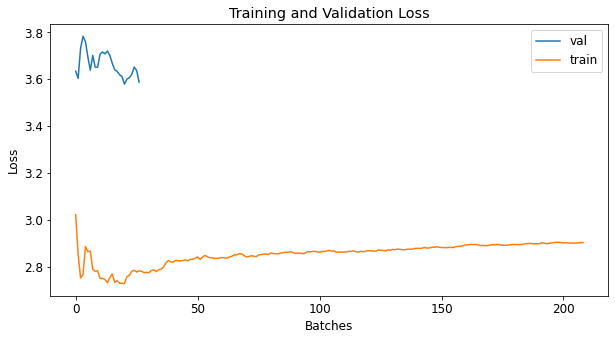

Epoch: 21 	Training Loss: 0.000424 	Validation Loss: 0.004203

Validation loss has dcreased from 0.004286 to 0.004203! Saving model~



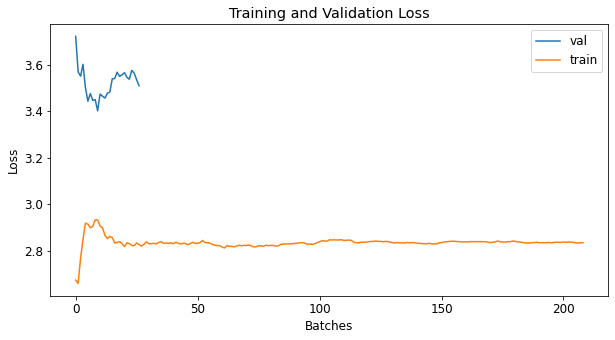

Epoch: 22 	Training Loss: 0.000415 	Validation Loss: 0.004331


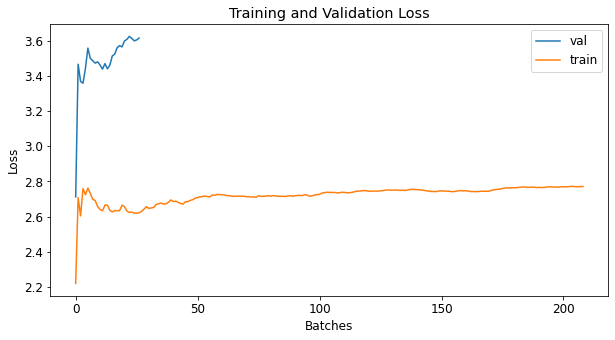

Epoch: 23 	Training Loss: 0.000412 	Validation Loss: 0.004279


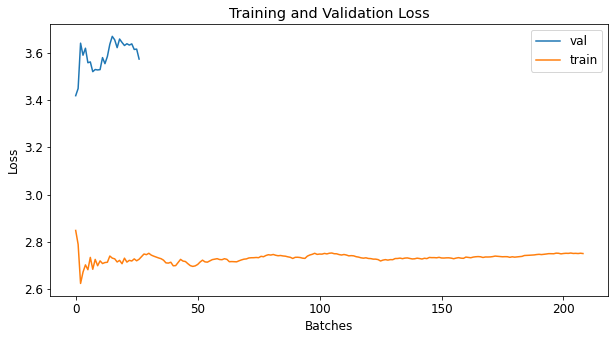

Epoch: 24 	Training Loss: 0.000401 	Validation Loss: 0.004343


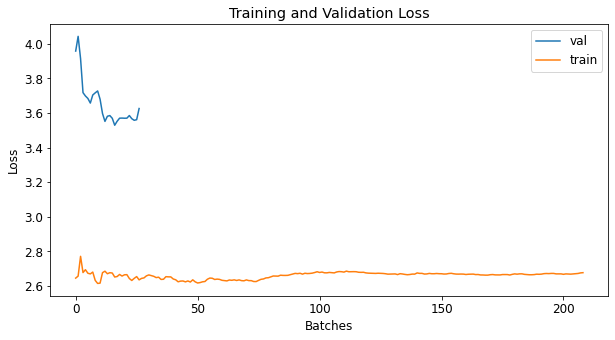

Epoch: 25 	Training Loss: 0.000392 	Validation Loss: 0.004317


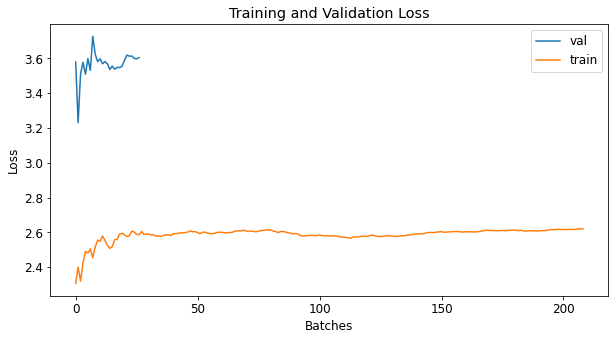

Epoch: 26 	Training Loss: 0.000386 	Validation Loss: 0.004419


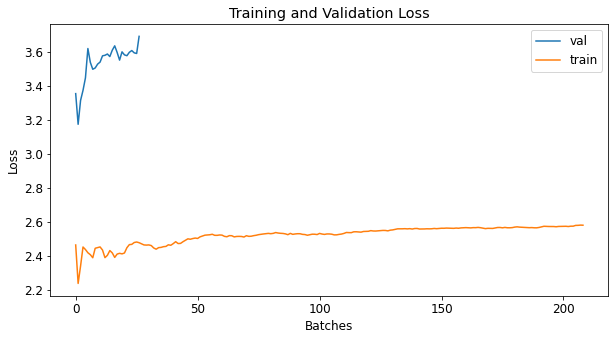

Epoch: 27 	Training Loss: 0.000377 	Validation Loss: 0.004268


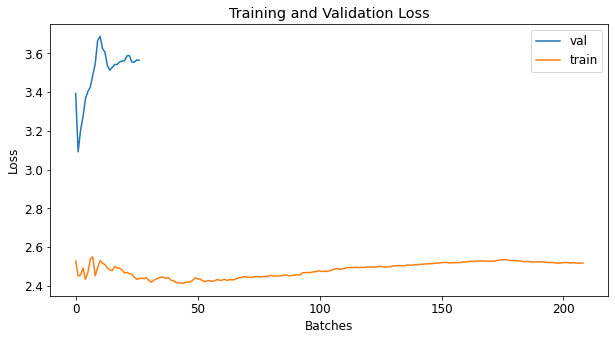

Epoch: 28 	Training Loss: 0.000369 	Validation Loss: 0.004274


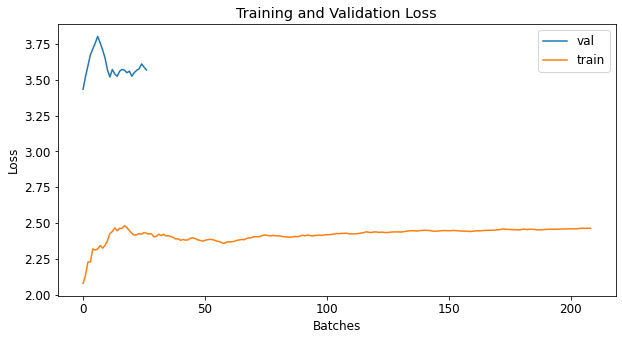

Epoch: 29 	Training Loss: 0.000367 	Validation Loss: 0.004420


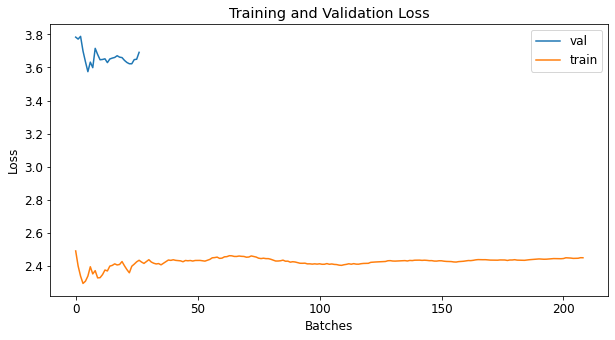

Epoch: 30 	Training Loss: 0.000355 	Validation Loss: 0.004255


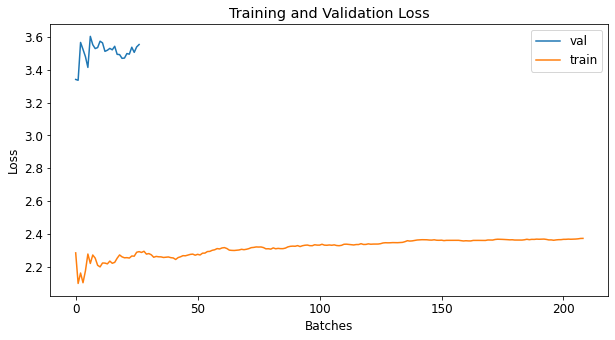

Epoch: 31 	Training Loss: 0.000349 	Validation Loss: 0.004368


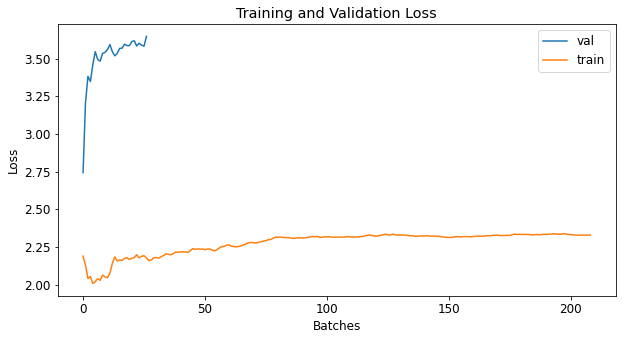

Epoch: 32 	Training Loss: 0.000343 	Validation Loss: 0.004267


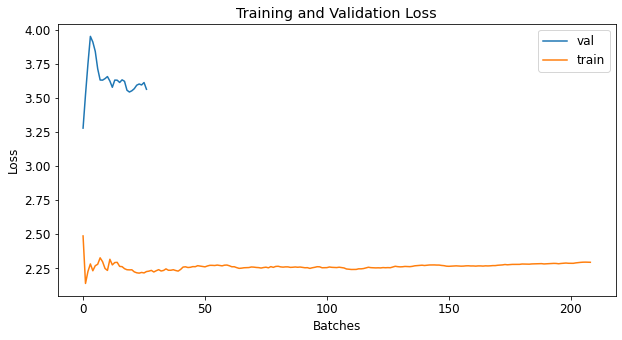

Epoch: 33 	Training Loss: 0.000339 	Validation Loss: 0.004529


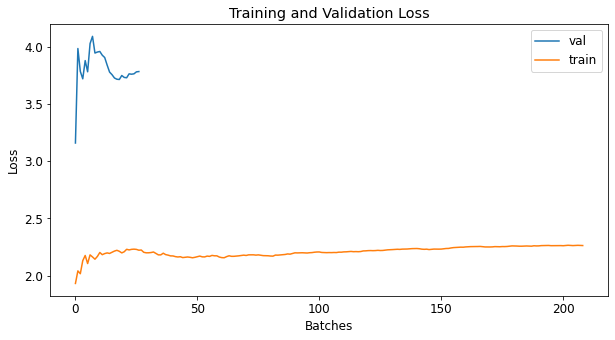

Epoch: 34 	Training Loss: 0.000328 	Validation Loss: 0.004420


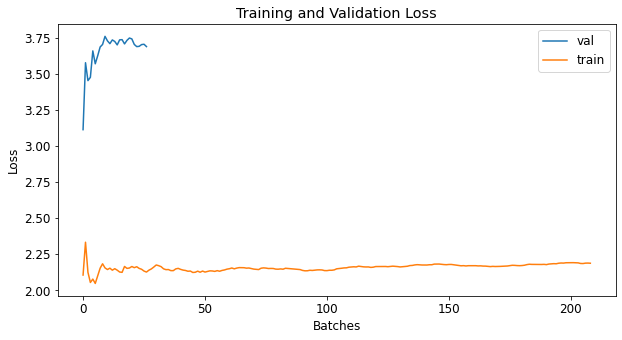

Epoch: 35 	Training Loss: 0.000322 	Validation Loss: 0.004518


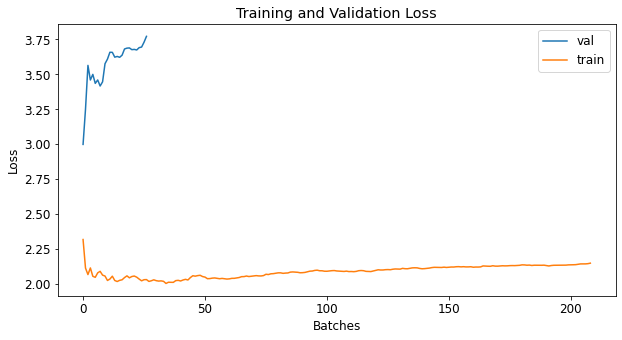

Epoch: 36 	Training Loss: 0.000315 	Validation Loss: 0.004377


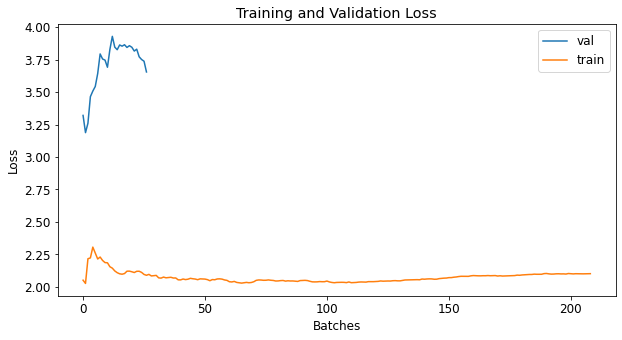

Epoch: 37 	Training Loss: 0.000309 	Validation Loss: 0.004477


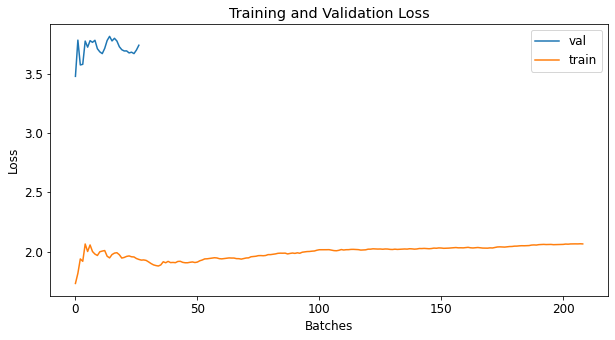

Epoch: 38 	Training Loss: 0.000301 	Validation Loss: 0.004626


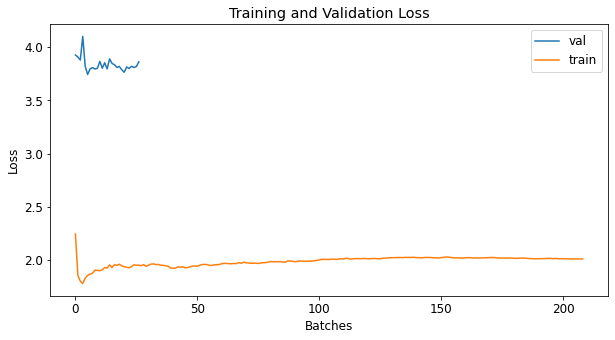

Epoch: 39 	Training Loss: 0.000300 	Validation Loss: 0.004446


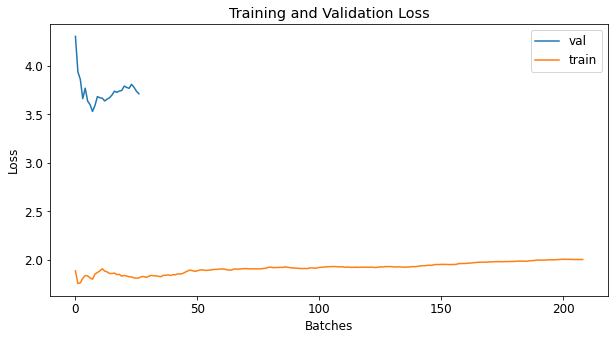

Epoch: 40 	Training Loss: 0.000291 	Validation Loss: 0.004505


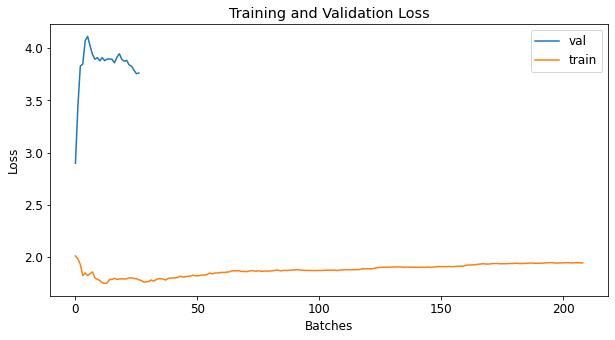

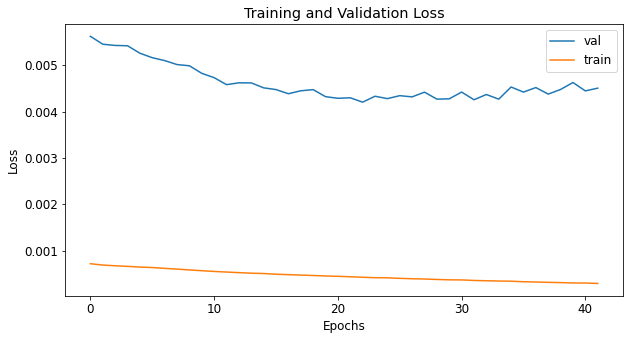

In [21]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        val_losses_internel = []
        train_losses_internel  = []
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs.cuda(), target.cuda())        
            loss.backward()
            optimizer.step()

            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_losses_internel.append(train_loss.cpu().detach())
            
#         train_losses_internel[:] = [x / len(loaders['train'].dataset) for x in train_losses_internel]
        train_loss = train_loss / len(loaders['train'].dataset)
        train_losses.append(train_loss.cpu().detach())            

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            out = model(data)
            loss = criterion(out.cuda(), target.cuda())            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            val_losses_internel.append(valid_loss.cpu().detach())
        
#         val_losses_internel[:] = [x / len(loaders['valid'].dataset) for x in val_losses_internel]
        valid_loss = valid_loss / len(loaders['valid'].dataset)
        val_losses.append(valid_loss.cpu().detach())            

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('\nValidation loss has dcreased from {:.6f} to {:.6f}! Saving model~\n'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss            

        plt.figure(figsize=(10,5))
        plt.rcParams.update({'font.size': 12})
        plt.title("Training and Validation Loss")
        plt.plot(val_losses_internel,label="val")
        plt.plot(train_losses_internel,label="train")
        plt.xlabel("Batches")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()

    plt.figure(figsize=(10,5))
    plt.rcParams.update({'font.size': 12})
    plt.title("Training and Validation Loss")
    plt.plot(val_losses,label="val")
    plt.plot(train_losses,label="train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
            
    # return trained model
    return model

# train the model
model_scratch = train(40, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [22]:
test_losses_list_internal = []
test_losses_list_externel = []

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.
    y_pred = []
    y_true = []
    
    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)

        test_losses_list_internal.append(loss.data)
        test_losses_list_externel.append(test_loss.cpu().detach())
    
        y_pred.append(np.squeeze(pred).cpu().numpy())
        y_true.append(np.squeeze(target).cpu().numpy())
    
    y_pred = np.concatenate( y_pred, axis=0)
    y_true = np.concatenate( y_true, axis=0)

    recall = recall_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    score_f1  = f1_score(y_true, y_pred, average='macro')
        
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

    print("Recall    = ", recall*100, "%")
    print("Precision = ", precision*100, "%")
    print("F1 score  = ", score_f1*100, "%")
    
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.618966


Test Accuracy: 18% (156/836)
Recall    =  17.295918367346943 %
Precision =  14.70242399951541 %
F1 score  =  14.411940819523242 %


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


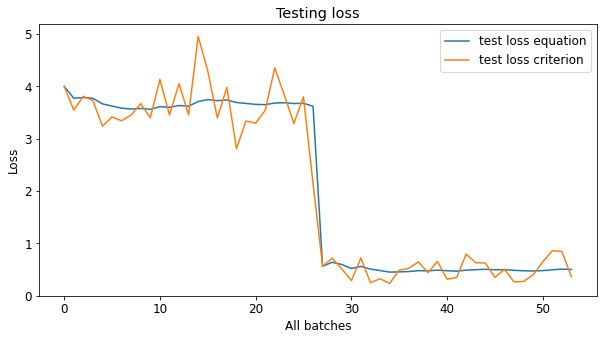

In [44]:
test_losses_list_internal[0]
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 12})
plt.title("Testing loss")
plt.plot(test_losses_list_externel,label="test loss equation")
plt.plot(test_losses_list_internal,label="test loss criterion")
plt.xlabel("All batches")
plt.ylabel("Loss")
plt.legend()
plt.show()

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(4096, 133)

# Specify which parameters needs optimzation and then send them to the optimizer
params_to_update = []
for name, param in model_transfer.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        
if use_cuda:
    model_transfer = model_transfer.cuda()
    
print(model_transfer)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__                                           
I simply used the VGG16 as the model achieves 92.7% top-5 test accuracy in ImageNet so i decided to use it as a pre-trained model. Then transfer learning is used to get the model to predict the right classes. Transfer learning is done by replacing the final Dense layer with a new Dense layer that has the right amount of classes needed, 133. First we freeze all the weights in the model, then we add the new Dense layer. The new layer added to the model is by default trainable. Then we get the features we want to train and pass them to the optimizer. Then we train the model again, by only training the final layer only.                     
Why VGG-16?     
In the previous steps, we used it to detect dogs out of 1000 classes according to a specific index range and the results were great. This gave me the idea to use it again, but this time with appropriate dataset and appropriate classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [27]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(params_to_update, 0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

Epoch: 1 	Training Loss: 0.000211 	Validation Loss: 0.000695

Validation loss has dcreased from inf to 0.000695! Saving model~



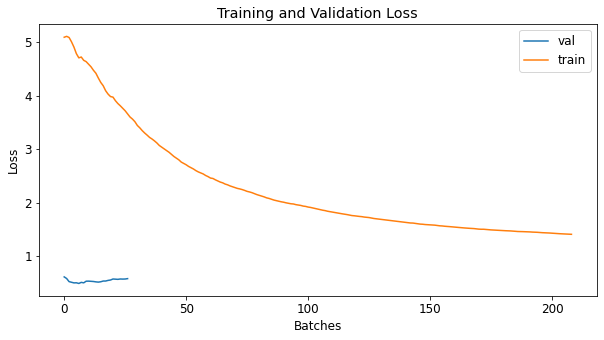

Epoch: 2 	Training Loss: 0.000099 	Validation Loss: 0.000594

Validation loss has dcreased from 0.000695 to 0.000594! Saving model~



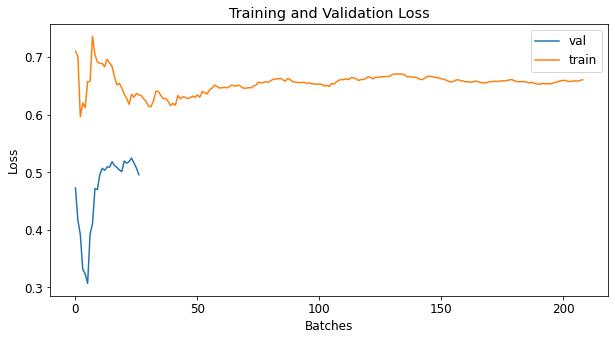

Epoch: 3 	Training Loss: 0.000089 	Validation Loss: 0.000562

Validation loss has dcreased from 0.000594 to 0.000562! Saving model~



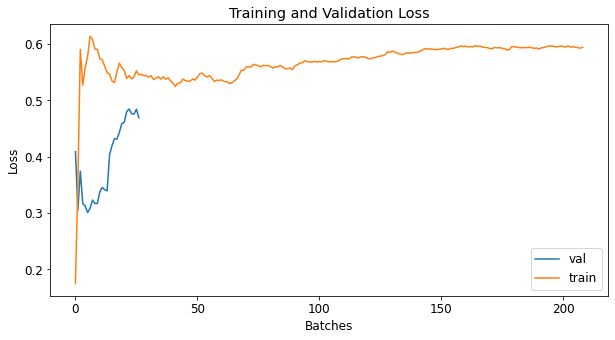

Epoch: 4 	Training Loss: 0.000076 	Validation Loss: 0.000576


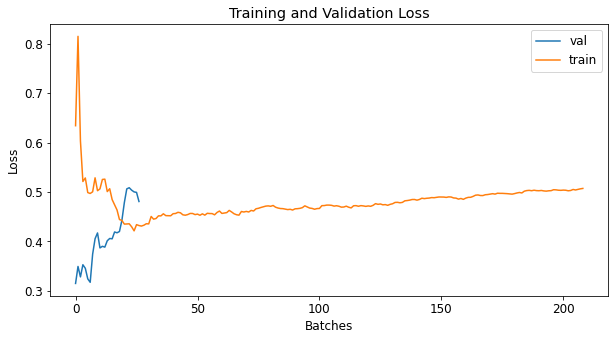

Epoch: 5 	Training Loss: 0.000070 	Validation Loss: 0.000588


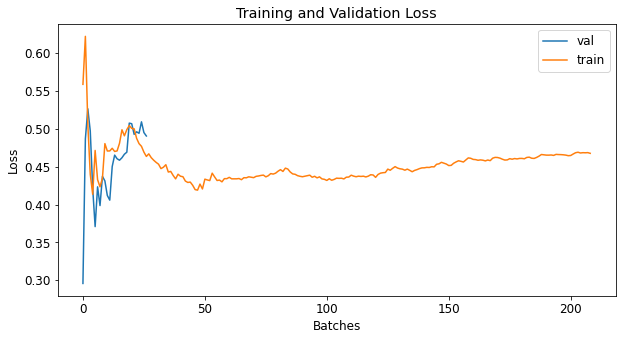

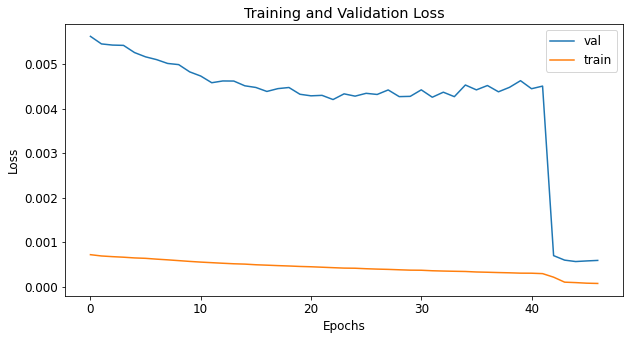

In [28]:
# train the model
model_transfer = train(5, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [29]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.501513


Test Accuracy: 84% (709/836)
Recall    =  84.34180689819789 %
Precision =  85.51095312373508 %
F1 score  =  83.49488930647709 %


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [30]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

data_transfer = {}
_, data_transfer['train'] = Create_DataLoader(dir_dogs_train, 'train')

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]


def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = Image.open(img_path)
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(227),
                                    transforms.ToTensor(),
                                    transforms.Normalize([0.485, 0.456, 0.406],
                                                         [0.229, 0.224, 0.225]),])
    img = transform(img).unsqueeze(0)
    result = model_transfer(img.cuda())
    _, pred_tensor = torch.max(result, 1)
    
    return class_names[np.squeeze(pred_tensor.cpu().numpy())]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [36]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    
    # The app assumes it's always a dog or a human, otherwise get_the_breed = False
    get_the_breed = True
    title = ' '
    
    ## handle cases for a human face, dog, and neither
    if dog_detector(img_path):
        title = 'dog, \nThe predicted dog breed is: '
        
    elif face_detector(img_path):
        title = 'human, \nThe resembling dog breed is : '
        
    else:
        get_the_breed = False
        plt.imshow(Image.open(img_path))
        plt.title("\nThe app works only on humans and dogs, the image is irrelevent\n")
        plt.axis('off')
        plt.show()
    
    # Detect the breed and plot the image
    if get_the_breed:
        # Show the image again
        plt.imshow(Image.open(img_path))
        plt.title("Hello " + title + predict_breed_transfer(img_path) + "\n")
        plt.axis('off')
        plt.show()


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__      
The output actually is pretty good, espically with other animals. It can detect humans, dogs and other animals at good precision. So it's as expected, however more testing with other images can be useful in determining how good the model is. So far, the model is behaving orrectly.                             
3 points to improve the model:                         
1. In order to improve the model, we need to lower the variance.                          
This can be addressed by trying another network, adding a regulization layer or getting more data.                
2. We can potentially train the network longer in order to improve the training set performance                 
3. We can change the optimization and criterion algorithms used and add softmax layer after the final Dense layer.

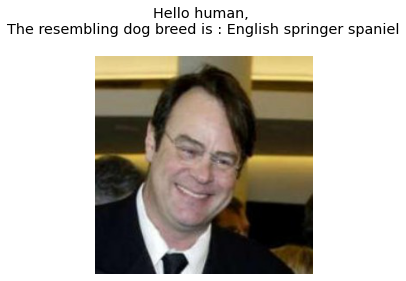

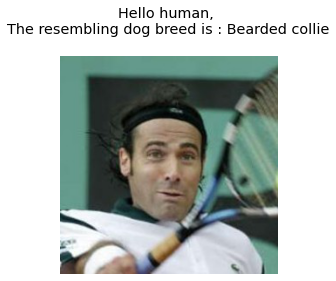

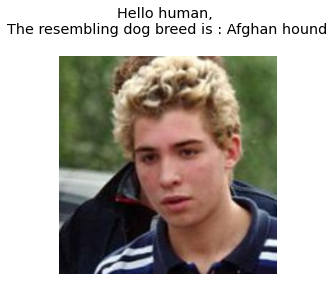

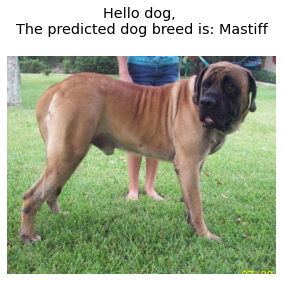

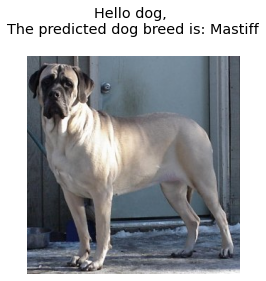

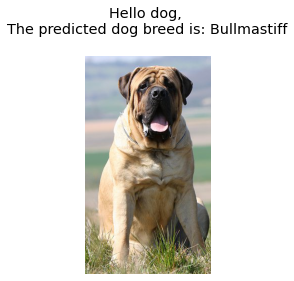

In [32]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

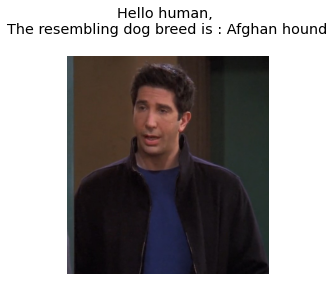

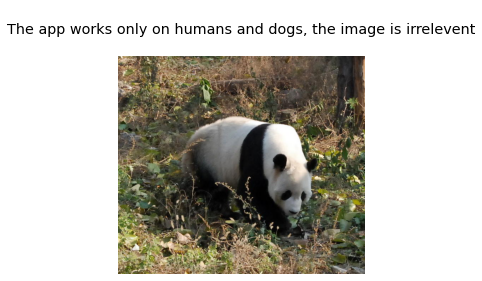

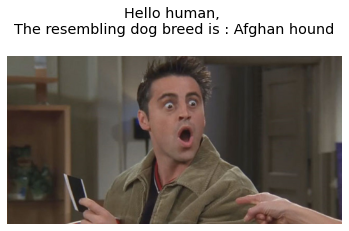

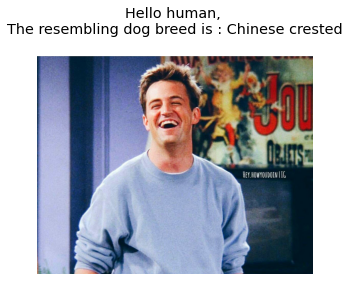

In [41]:
run_app('friends.s08e16.720p.jpg')
run_app('giant_panda.jpg')
run_app('jj.jpg')
run_app('cc.jpg')
